#### Importing Libraries



In [2]:
#Select the cell and click on run icon 
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')


#### Load Dataset



In [4]:
data = pd.read_csv('SalesPredictionDATA.csv')
data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-20,Morning,WA,Kids,8,20000
1,1-Oct-20,Morning,WA,Men,8,20000
2,1-Oct-20,Morning,WA,Women,4,10000
3,1-Oct-20,Morning,WA,Seniors,15,37500
4,1-Oct-20,Afternoon,WA,Kids,3,7500


In [5]:
#Select the cell and click on run icon 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


#### Data Analysis
Perform descriptive statistical analysis on the data 



In [6]:
#Select the cell and click on run icon 
data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [7]:
#now we found out the shape of the dataset
data.shape

(7560, 6)

#### Inspect the data manually  functions isna(), and notna().



In [8]:
#with this we will find out that is there any null value in the dataset
data.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [9]:
#now we find the incorrect data
data.isna()

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [10]:
data.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-20,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-20,Evening,TAS,Kids,15,37500
7557,30-Dec-20,Evening,TAS,Men,15,37500
7558,30-Dec-20,Evening,TAS,Women,11,27500
7559,30-Dec-20,Evening,TAS,Seniors,13,32500


In [11]:

#Select the cell and click on run icon 
data.columns


Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

#### ------        Data Analysis        -------



##### Determine which group is generating the highest sales, and which group is generating the lowest sales.



In [12]:
gb_group= data.groupby('Group')
gb_group.first()

,Date,Time,State,Unit,Sales
Group,,,,,
Kids,1-Oct-20,Morning,WA,8,20000
Men,1-Oct-20,Morning,WA,8,20000
Seniors,1-Oct-20,Morning,WA,15,37500
Women,1-Oct-20,Morning,WA,4,10000


In [13]:
sorted_gb_group = gb_group['Sales'].sum().sort_values(ascending=False)
sorted_gb_group

Group
 Men        85750000
 Women      85442500
 Kids       85072500
 Seniors    84037500
Name: Sales, dtype: int64

##### Determine which state is generating the highest sales, and which group is generating the lowest sales.


In [14]:
gb_state=data.groupby('State')
gb_state.first()

,Date,Time,Group,Unit,Sales
State,,,,,
NSW,1-Oct-20,Morning,Kids,39,97500
NT,1-Oct-20,Morning,Kids,13,32500
QLD,1-Oct-20,Morning,Kids,20,50000
SA,1-Oct-20,Morning,Kids,12,30000
TAS,1-Oct-20,Morning,Kids,13,32500
VIC,1-Oct-20,Morning,Kids,49,122500
WA,1-Oct-20,Morning,Kids,8,20000


In [15]:
sorted_gb_state = gb_state['Sales'].sum().sort_values(ascending=False)
sorted_gb_state

State
 VIC    105565000
 NSW     74970000
 SA      58857500
 QLD     33417500
 TAS     22760000
 NT      22580000
 WA      22152500
Name: Sales, dtype: int64

#### ------------     weekly, monthly and quarterly reports     ------------

In [16]:
#Generate weekly, monthly and quarterly reports for the analysis made.
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
data.set_index('Date', inplace=True)

In [18]:
weekly_report = data.resample('W').sum()
print(weekly_report)

                                                         Time   
Date                                                            
2020-10-04   Morning Morning Morning Morning Afternoon Aft...  \
2020-10-11   Morning Morning Morning Morning Afternoon Aft...   
2020-10-18   Morning Morning Morning Morning Afternoon Aft...   
2020-10-25   Morning Morning Morning Morning Afternoon Aft...   
2020-11-01   Morning Morning Morning Morning Afternoon Aft...   
2020-11-08   Morning Morning Morning Morning Afternoon Aft...   
2020-11-15   Morning Morning Morning Morning Afternoon Aft...   
2020-11-22   Morning Morning Morning Morning Afternoon Aft...   
2020-11-29   Morning Morning Morning Morning Afternoon Aft...   
2020-12-06   Morning Morning Morning Morning Afternoon Aft...   
2020-12-13   Morning Morning Morning Morning Afternoon Aft...   
2020-12-20   Morning Morning Morning Morning Afternoon Aft...   
2020-12-27   Morning Morning Morning Morning Afternoon Aft...   
2021-01-03   Morning Morn

In [19]:
monthly_report = data.resample('M').sum()
print(monthly_report)

                                                         Time   
Date                                                            
2020-10-31   Morning Morning Morning Morning Afternoon Aft...  \
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State   
Date                                                            
2020-10-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...  \
2020-11-30   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group   Unit   
Date                                                                   
2020-10-31   Kids Men Women Seniors Kids Men Women Seniors...  45716  \
2020-11-30   Kids Men Women Seniors Kids Men Women Seniors...  36273   
2020-12-31   Kids Men Women Seniors Kids Men Women Seniors..

In [20]:
quarterly_report = data.resample('Q').sum()
print(quarterly_report)

                                                         Time   
Date                                                            
2020-12-31   Morning Morning Morning Morning Afternoon Aft...  \

                                                        State   
Date                                                            
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...  \

                                                        Group    Unit   
Date                                                                    
2020-12-31   Kids Men Women Seniors Kids Men Women Seniors...  136121  \

                Sales  
Date                   
2020-12-31  340302500  


#### Data Visualization



<Axes: xlabel='Sales'>

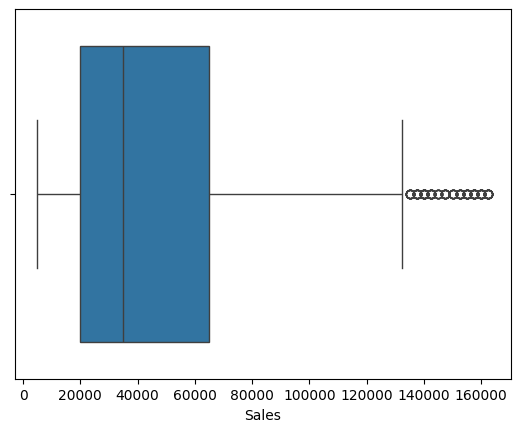

In [21]:
sns.boxplot(x = data['Sales'])

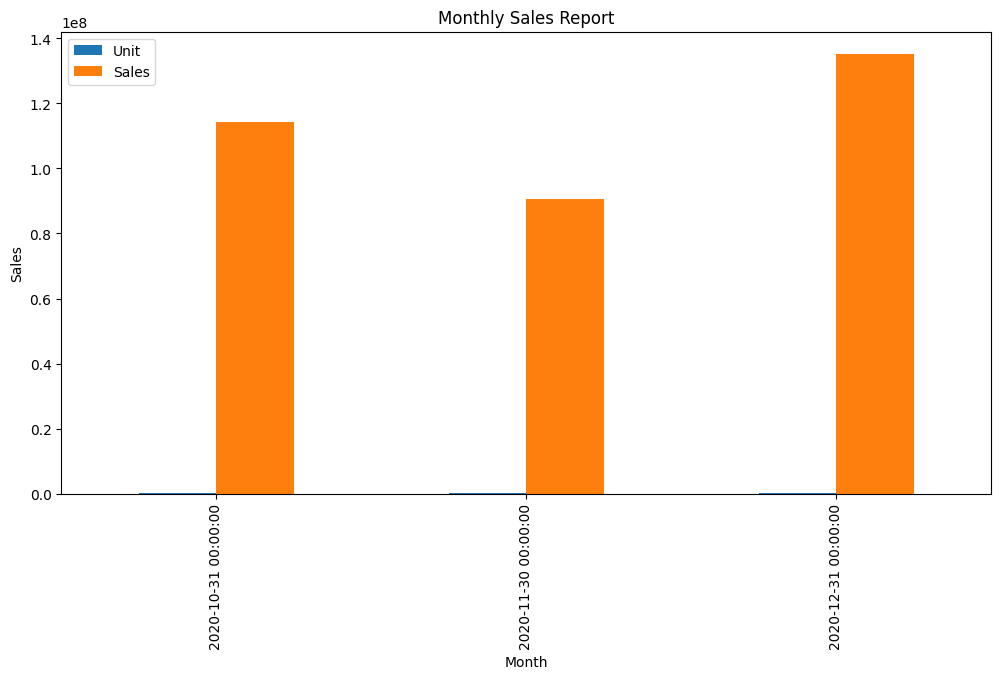

In [22]:
monthly_report.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Sales Report')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

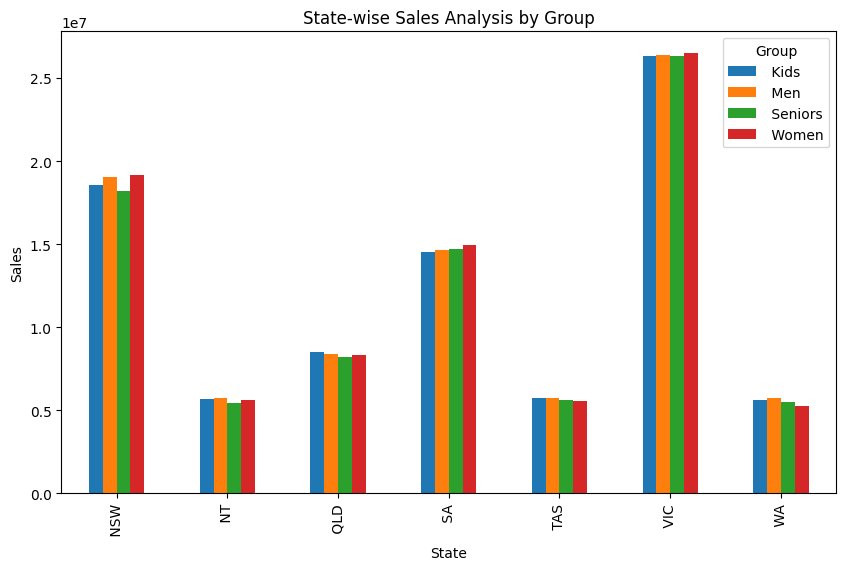

In [23]:
# State-wise sales analysis for different groups
state_group_sales = data.pivot_table(index='State', columns='Group', values='Sales', aggfunc='sum')
state_group_sales.plot(kind='bar', figsize=(10, 6))
plt.title('State-wise Sales Analysis by Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

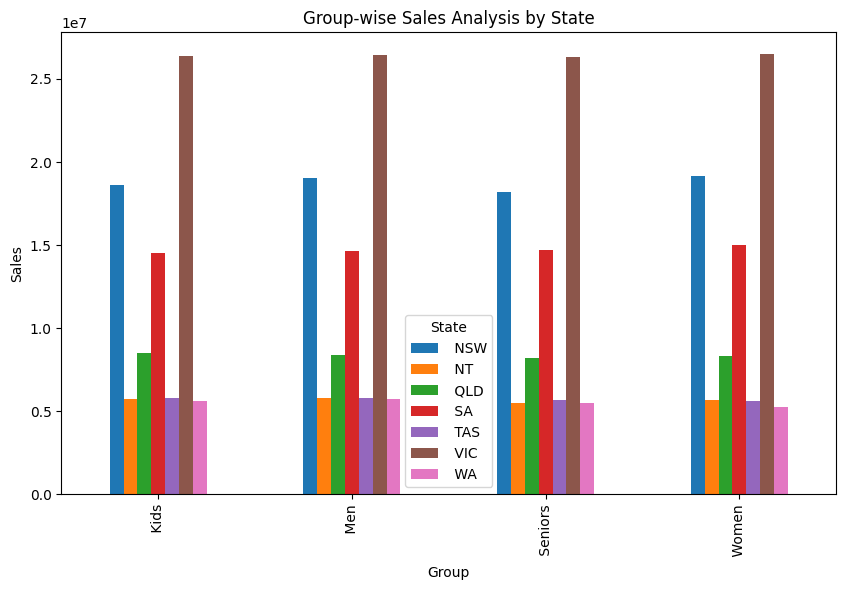

In [24]:
# Group-wise sales analysis across different states
group_state_sales = data.pivot_table(index='Group', columns='State', values='Sales', aggfunc='sum')
group_state_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Group-wise Sales Analysis by State')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

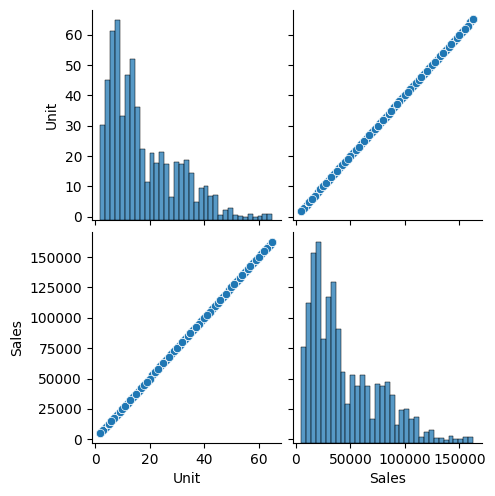

In [37]:
sns.pairplot(data)
plt.show